# Data Diri
- Nama: Ichwan Akmaluddin
- Kelas: MC-18
- ID: MC299D5Y1451

# Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

Langkah awal yang dilakukan yaitu memasukan library apa saja yang dibutuhkan untuk menjalankan tiap code pada projek ini.

# Data Loading

In [2]:
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


Membuka file csv yang akan digunakan dan melihat beberapa data terlebih dahulu.

In [3]:
# Tampilkan informasi umum tentang dataset
print("\nInformasi dataset:")
df.info()


Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


Melihat apa saja yang terdapat pada file seperti kelas yang digunakan, tipe data apa yang digunakan dan banyaknya data.

In [4]:
# Cek missing values
print("\nMissing values per fitur:")
print(df.isnull().sum())


Missing values per fitur:
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


Code di atas memperlihatkan apakah ada missing value yang ada pada data kali ini, dan didapatkan tidak ada data yang hilang.

In [5]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


Kemudian di sini kita bisa melihat jumlah data, mean std, minimal, maksimal dan nilai lainnya. Dengan melakukan ini juga kita bisa melihat apakah ada data yang terlihat anomali dan tidak seharusnya. Pada data kali ini bisa terlihat ada data yang berada di bawah nilai 0 yang akan dilakuakn proses nantinya.

## Exploratory Data Analysis

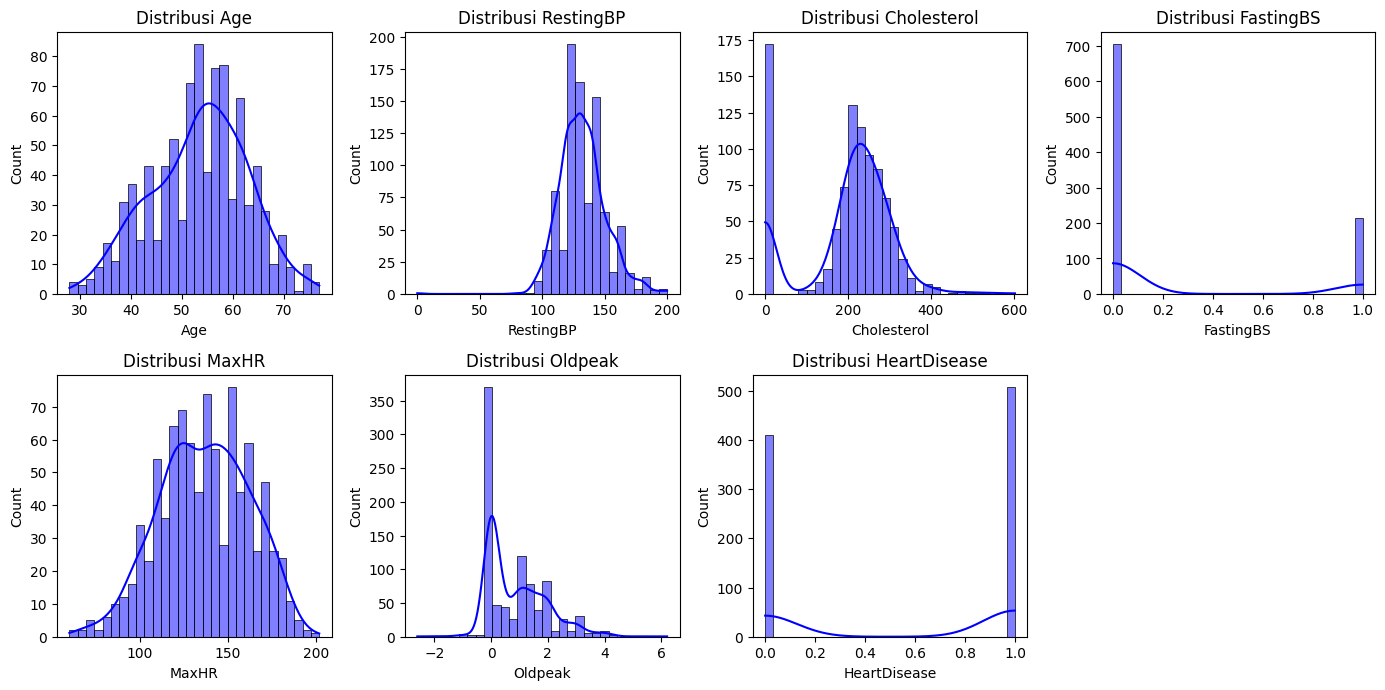

In [6]:
# Distribusi fitur numerik
num_features = df.select_dtypes(include=[np.number])
plt.figure(figsize=(14, 10))
for i, column in enumerate(num_features.columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(df[column], bins=30, kde=True, color='blue')
    plt.title(f'Distribusi {column}')
plt.tight_layout()
plt.show()

Dalam visualisasi data numerik kali ini kita melihat penyebaran data yang ada, di sini juga bisa dilihat tidak semua data dimulai dari 0, sehingga bisa dipertanyakan apakah data tersebut benar?

C:\Users\saflo\AppData\Local\Temp\ipykernel_9640\3498455029.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], palette='viridis')
C:\Users\saflo\AppData\Local\Temp\ipykernel_9640\3498455029.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], palette='viridis')
C:\Users\saflo\AppData\Local\Temp\ipykernel_9640\3498455029.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], palette='viridis')
C:\Users\saflo\AppData\Local\Temp\ipykernel_9640\3498455029.py:6: FutureWarning: 

Passing `palette` witho

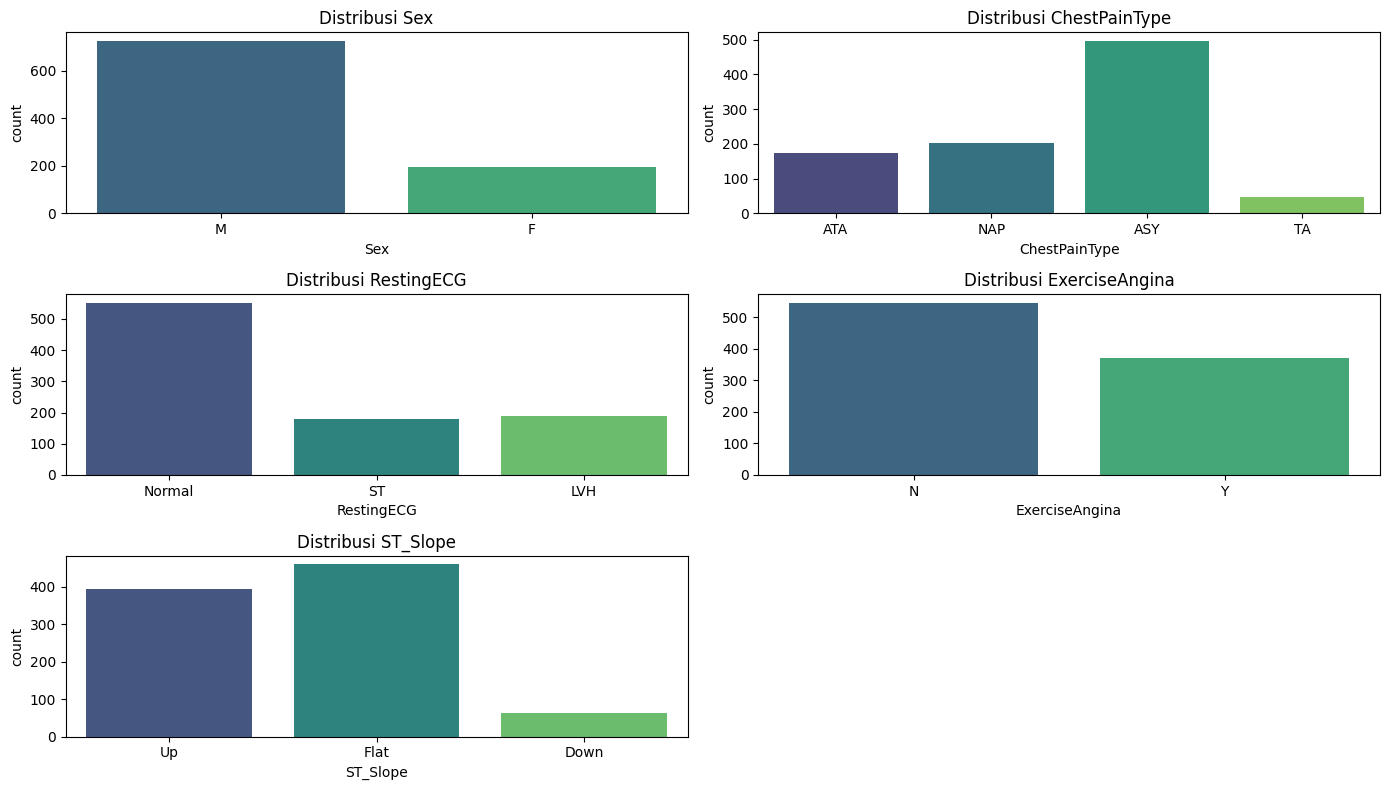

In [7]:
# Distribusi fitur kategorikal secara vertikal (berdiri)
cat_features = df.select_dtypes(include=[object])
plt.figure(figsize=(14, 8))
for i, column in enumerate(cat_features.columns, 1):
    plt.subplot(3, 2, i)
    sns.countplot(x=df[column], palette='viridis')
    plt.title(f'Distribusi {column}')
plt.tight_layout()
plt.show()

Dari visualisasi ini, untuk gender pada pasien terlihat paling banyak adalah *pasien lelaki*, chestPainType terlihat paling banyak adalah ASY atau tidak menunjukkan gejala nyeri dada sama sekali, RestingECG kebanyakan datanya adalah normal, ExerciseAngina juga terlihat banyak pada kelas N yang artinya pada tidak ada nyeri pada pasien saat melakukan latihan. Terakhir juga pada ST_Slope terlihat paling banyak pada flat yang artinya  bisa jadi ada masalah pada jantung.

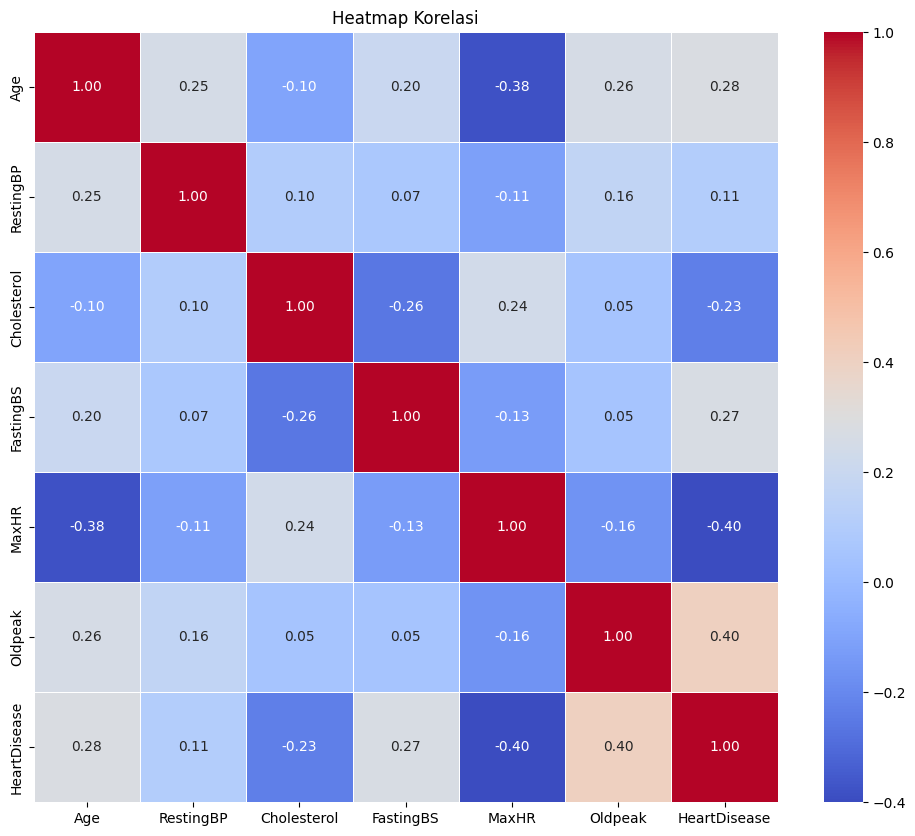

In [8]:
# Heatmap korelasi untuk fitur numerik
plt.figure(figsize=(12, 10))
correlation_matrix = num_features.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi')
plt.show()

Dari Heatmap yang terlihat ada parameter yang menjelaskan seberapa besar korelasi yang ada pada tiap kolom, dan kebanyakan data memiliki korelasi yang tidak begitu kuat korelasinya, namun jika dilihat lagi bahwa korelasi pada data ```heartDisease``` memiliki korelasi yang lebih kuat ke data-data lainnya, terutama dengan data ```oldPeak``` sampai dengan nilai 0.40 yang juga bisa dilihat lebih merah dibandingkan yang lain (selain dari hubungan antar data yang sama).

# Preparing Data

In [9]:
df['Oldpeak'] = df['Oldpeak'].apply(lambda x: 0 if x < 0 else x)
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.901307,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.045100,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,0.000000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


Karena sebelumnya data yang terlihat ada kejanggalan, maka di sini data tersebut bisa kita ubah terlebih dahulu menjadi 0, atau jika memang datanya tidak terlalu penting maka kita bisa saja menghapus data tersebut. Sehingga pada hasil akhirnya terlihat data yang ada memiliki nilai minimal 0.

In [10]:
df.duplicated().sum()

0

Untuk melakukan persiapan sebelum permodelan kita bisa melihat terlebih dahulu apakah ada data yang terduplikat. Pada kasus kali ini tidak ada data yang terduplikan sehingga mengahasilkan output 0.

In [11]:
# Lakukan one-hot encoding pada kolom kategorikal
df_encoded = pd.get_dummies(df, columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype=int)

# Tampilkan hasilnya
df_encoded.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1


Untuk komputer bisa lebih mudah dalam memahami bahasa manusia, maka bahasa ini akan diproses ke bahasa komputer telebih dahulu agar bisa lebih mudah dipahami komputer, untuk caranya sendiri di sini akan menggunakan teknik one-shot encoding dengan menjadikannya nilai integer.

# Permodelan

In [12]:
X = df_encoded.drop('HeartDisease', axis=1)
y = df_encoded['HeartDisease']

Memberi label berupa nilai X dan y yang akan kita gunakan nanti dalam membuat permodelan.

In [13]:
# Split data menjadi 80% training dan 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

Membagi data training dan testing sebesar 80:20.

In [14]:
# Latih model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

svm = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm.fit(X_train, y_train)

print("Model Random Forest dan SVM telah selesai dilatih.")

Model Random Forest dan SVM telah selesai dilatih.


Pada tahap ini telah dilakukan permodelan dengan menggunkana algoritma Random Forest dan SVM dan berhasil dilatih.

# Evaluasi


Evaluasi Model: Random Forest
Accuracy: 0.8967
Precision: 0.8968
Recall: 0.8967
F1 Score: 0.8965
Confusion Matrix:
[[71 11]
 [ 8 94]]


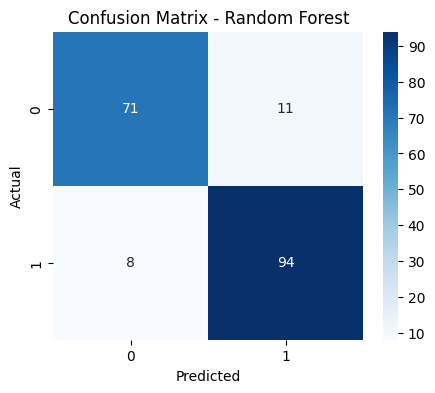


Evaluasi Model: SVM
Accuracy: 0.7174
Precision: 0.7182
Recall: 0.7174
F1 Score: 0.7177
Confusion Matrix:
[[57 25]
 [27 75]]


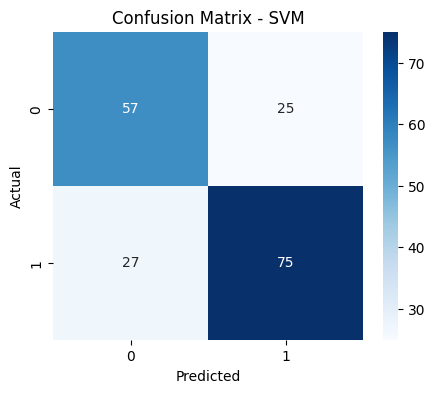

In [15]:
models = {'Random Forest': rf, 'SVM': svm}

for name, model in models.items():
    print(f"\nEvaluasi Model: {name}")
    
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("Confusion Matrix:")
    print(conf_matrix)
    
    plt.figure(figsize=(5, 4))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

Di tahap terakhir ini sudah dilakukan evaluasi, apakah model dengan algoritma yang dipilih cocok untuk kasus kali ini? Hasilnya terlihat bahwa menggunkan algoritma Random Forest lebih akurat dibandingkan dengan algoritma SVM.